## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#37ABC4;"> Customer Churn Prediction for Retention Strategy

### OBJECTIVE-1: To Build a model that will help to identify the potential customers who have a higher probability to churn. This helps the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#D70D07;"> Data Understanding & Exploration:

In [1]:
#Importing all the libraries
import pandas as pd

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

#Machine learning libraries
from sklearn.model_selection import train_test_split

#Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Ensembel Technique models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier 

#Performance measures
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

import warnings
warnings.simplefilter("ignore")

In [32]:
churn_1 = pd.read_csv("Downloads/TelcomCustomer-Churn_1.csv")
churn_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [33]:
churn_2 = pd.read_csv("Downloads/TelcomCustomer-Churn_2.csv")
churn_2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
print('Shape of churn_1: ', churn_1.shape)
print('Shape of churn_2: ', churn_2.shape)

Shape of churn_1:  (7043, 10)
Shape of churn_2:  (7043, 12)


In [35]:
print('Columns of churn_1: ', churn_1.columns)
print('')
print('Columns of churn_2: ', churn_2.columns)

Columns of churn_1:  Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'],
      dtype='object')

Columns of churn_2:  Index(['customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [36]:
churn_1.describe()

,SeniorCitizen,tenure
count,7043.000000,7043.000000
mean,0.162147,32.371149
std,0.368612,24.559481
min,0.000000,0.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,55.000000
max,1.000000,72.000000


In [37]:
churn_2.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [38]:
churn_1.dtypes

customerID         object
gender             object
SeniorCitizen       int64
Partner            object
Dependents         object
tenure              int64
PhoneService       object
MultipleLines      object
InternetService    object
OnlineSecurity     object
dtype: object

In [39]:
churn_2.dtypes

customerID           object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [40]:
# Merging both the DataFrames on key ‘customerID’ to form a single DataFrame
churn_df = churn_1.merge(churn_2, on='customerID')
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [41]:
churn_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [42]:
churn_df.shape

(7043, 21)

In [43]:
churn_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [44]:
# Verifying if all the columns are incorporated in the merged Dataframe
print('columns of churn_1 in churn_df: ')
set(churn_1.columns).intersection(set(churn_df.columns))

columns of churn_1 in churn_df: 


{'Dependents',
 'InternetService',
 'MultipleLines',
 'OnlineSecurity',
 'Partner',
 'PhoneService',
 'SeniorCitizen',
 'customerID',
 'gender',
 'tenure'}

In [45]:
print('columns of churn_2 in churn_df: ')
set(churn_2.columns).intersection(set(churn_df.columns))

columns of churn_2 in churn_df: 


{'Churn',
 'Contract',
 'DeviceProtection',
 'MonthlyCharges',
 'OnlineBackup',
 'PaperlessBilling',
 'PaymentMethod',
 'StreamingMovies',
 'StreamingTV',
 'TechSupport',
 'TotalCharges',
 'customerID'}

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#D70D07;">Data Cleaning & Analysis:  

In [46]:
# Verifying is there are any null values
null = churn_df.isnull().sum()
null

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [47]:
pd.to_numeric(churn_df['TotalCharges'],errors = 'coerce').isna().sum()

11

In [48]:
churn_df['MonthlyCharges'].dtypes

dtype('float64')

In [49]:
churn_df['TotalCharges'].dtypes

dtype('O')

In [50]:
churn_df.drop(churn_df.loc[churn_df['TotalCharges']== ' '].index, inplace=True)

In [51]:
churn_df['TotalCharges'] = churn_df['TotalCharges'].astype(float)

In [52]:
churn_df['TotalCharges'].dtypes

dtype('float64')

In [53]:
churn_df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

Here we can see that except customerID, tenure, MonthlyCharges and TotalCharges all other features should be categorical as it has discrete values.

In [54]:
list_str_obj_cols = churn_df.columns[churn_df.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    churn_df[str_obj_col] = churn_df[str_obj_col].astype("category")

In [55]:
churn_df['customerID'] = churn_df['customerID'].astype("object")

In [56]:
churn_df['SeniorCitizen'] = churn_df['SeniorCitizen'].astype("category")

In [57]:
churn_df.dtypes

customerID            object
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

<AxesSubplot:>

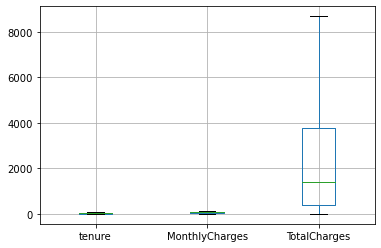

In [58]:
churn_df.boxplot()

It shows that there are no outliers in this data

In [59]:
a = []
for i in churn_df:
    a.append(i)
        
print(a)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [60]:
b = []
for i in a:
    if (churn_df[i].dtype.name) == 'category':
        b.append(i)
        
print(b)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [61]:
def pie_charts_for_CategoricalVar(pie_df,m):
    
    #get all the column names in the dataframe
    a = []
    for i in pie_df:
        a.append(i)
        
    b = []
    for i in a:
        if (pie_df[i].dtype.name) == 'category':
            b.append(i)
    
        
    plt.figure(figsize=(15, 12))
    plt.subplots_adjust(hspace=0.2)
    plt.suptitle("Pie-Charts for Categorical Variables in the dataframe", fontsize=18)
    
    # number of columns, as inputted while calling the function
    ncols = m
    # calculate number of rows
    nrows = len(b) // ncols + (len(b) % ncols > 0)
    
    # loop through the length of 'a' and keep track of index
    for n, i in enumerate(b):
        # add a new subplot iteratively using nrows and ncols
        ax = plt.subplot(nrows, ncols, n + 1)

        # filter df and plot 'i' on the new subplot axis
        pie_df.groupby(i).size().plot(kind='pie', autopct='%.2f%%',ax=ax)
        
        ax.set_title(i.upper())
        ax.set_xlabel("")
        ax.set_ylabel("")
    plt.show()

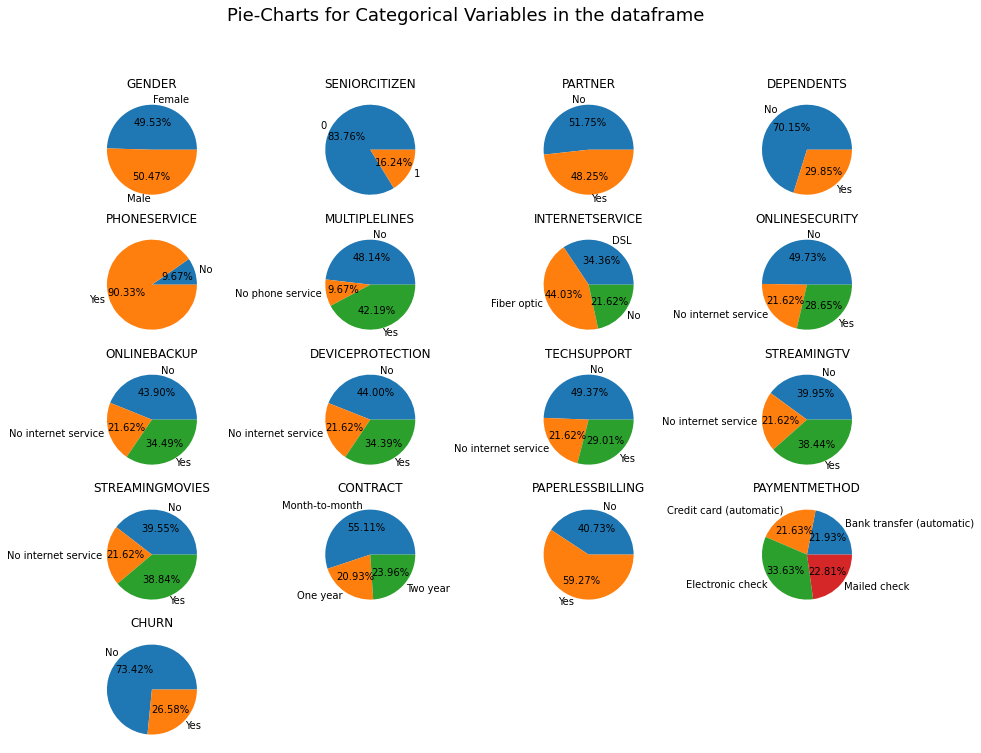

In [62]:
pie_charts_for_CategoricalVar(churn_df,4)

### Insights from the pie chart

1. Male and Female distribution is almost equal in this data.
2. More than 80% of people are not seniorcitizens.
3. 50% percentage of people are partners of the organization.
4. phone service is considerably high, it is around 90%.
5. In that 90% of phone service, 42% are multiple lines and others are not multiple lines.
6. The major source of internet service is fiber optic which is 44%, and 21% of people have no internet service, other use DSL.
7. 50% of The people who are having internet service, has online security, other not.
8. Only 34% of people have online backup and device protection.
9. 50% of people doesn't have tech support.
10. 38% of people can access streaming TV and streaming Movies.
11. Month-to-month contract(55%) are higher than one year and two year contracts.
12. 60% of people goes with paperless billing.
13. And among the various payment methods, 21% people use credit card, 21% people use bank transfer, 33% use electronic check and 22% use mailed check.
14. Finally 73% people are stick with the organization, only 26% were churned.

In [63]:
# Encoding all the appropriate categorical features
churn_df_new = churn_df.copy()
churn_df_new = pd.get_dummies(churn_df_new, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], drop_first=True)
churn_df_new.head()

,customerID,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,34,56.95,1889.50,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,2,53.85,108.15,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,45,42.30,1840.75,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,2,70.70,151.65,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1


In [64]:
# Splitting the data into 80% train and 20% test.
X = churn_df_new.drop(labels=['Churn_Yes', 'customerID'], axis=1)
y = churn_df_new['Churn_Yes']
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [65]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn_Yes, dtype: uint8

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [67]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)

Shape of X_train:  (5625, 30)
Shape of X_test:  (1407, 30)


In [68]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler

In [69]:
standardized_X_train = pd.DataFrame(
    StandardScaler().fit_transform(X_train),
    columns = X_train.columns)

standardized_X_train.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.273676,-1.508689,-0.995607,-1.009467,-0.442483,-0.961453,-0.652299,0.323198,-0.323198,-0.864544,...,1.914205,-0.795786,1.914205,-0.791918,-0.51634,-0.562225,0.830480,-0.524615,-0.711921,1.810405
1,1.373390,-1.473855,-0.409302,0.990622,-0.442483,-0.961453,1.533039,0.323198,-0.323198,-0.864544,...,1.914205,-0.795786,1.914205,-0.791918,-0.51634,1.778646,-1.204123,-0.524615,-0.711921,1.810405
2,1.577011,0.843392,1.918629,0.990622,-0.442483,1.040092,1.533039,0.323198,-0.323198,1.156679,...,-0.522410,1.256619,-0.522410,1.262758,-0.51634,1.778646,-1.204123,-0.524615,1.404651,-0.552363
3,1.617735,1.183432,2.210555,-1.009467,-0.442483,1.040092,-0.652299,0.323198,-0.323198,1.156679,...,-0.522410,1.256619,-0.522410,-0.791918,-0.51634,1.778646,-1.204123,-0.524615,-0.711921,-0.552363
4,-1.273676,-0.634537,-0.984057,0.990622,-0.442483,-0.961453,-0.652299,0.323198,-0.323198,-0.864544,...,-0.522410,-0.795786,-0.522410,-0.791918,-0.51634,-0.562225,0.830480,-0.524615,-0.711921,1.810405


In [70]:
standardized_X_test = pd.DataFrame(
    StandardScaler().fit_transform(X_test),
    columns = X_test.columns)

standardized_X_test.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.592457,-1.318415,-0.178536,0.990803,-0.431672,1.017929,1.532971,0.342861,-0.342861,1.228015,...,1.865715,-0.768004,1.865715,-0.816738,-0.507319,1.792366,-1.215365,1.892898,-0.711635,-0.508426
1,-0.694481,0.712873,-0.397894,-1.009283,2.316574,1.017929,-0.652328,0.342861,-0.342861,1.228015,...,-0.535988,-0.768004,-0.535988,1.224382,-0.507319,-0.557922,0.822798,1.892898,-0.711635,-0.508426
2,1.224913,1.118460,1.813064,-1.009283,-0.431672,-0.982387,-0.652328,0.342861,-0.342861,1.228015,...,-0.535988,1.302076,-0.535988,1.224382,-0.507319,1.792366,-1.215365,-0.528291,-0.711635,-0.508426
3,-0.980349,0.427956,-0.720437,-1.009283,-0.431672,-0.982387,-0.652328,0.342861,-0.342861,1.228015,...,-0.535988,-0.768004,-0.535988,-0.816738,-0.507319,-0.557922,0.822798,-0.528291,1.405215,-0.508426
4,-0.816996,0.572091,-0.589557,-1.009283,-0.431672,-0.982387,-0.652328,0.342861,-0.342861,-0.814322,...,-0.535988,-0.768004,-0.535988,-0.816738,-0.507319,-0.557922,0.822798,-0.528291,1.405215,-0.508426


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#D70D07;">3. Model building and Improvement: 
    
#### A. Train a model using XGBoost. Also print best performing parameters along with train and test performance.


In [2]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 322.8 kB/s eta 0:06:26
   ---------------------------------------- 0.5/124.9 MB 322.8 kB/s eta 0:06:26
   ---------------------------------------- 0.8/124.9 MB 377.2 kB/s eta 0:05:30
   ---------------------------------------- 1.0/124.9 MB 498.4 kB/s eta 0:04:09
   ---------------------------------------- 1.0/124.9 MB 498.4 kB/s eta 0:04:09
   -----------------------------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from xgboost import XGBRFClassifier

In [72]:
XGB_model = XGBClassifier()
XGB_model.fit(standardized_X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [73]:
y_pred = XGB_model.predict(standardized_X_test)
y_prob = XGB_model.predict_proba(standardized_X_test)
print('Predicted values is: ', y_pred)
print('')
print('Predicted probability is: ', y_prob)

Predicted values is:  [0 1 0 ... 0 0 0]

Predicted probability is:  [[9.9932510e-01 6.7489542e-04]
 [3.0417007e-01 6.9582993e-01]
 [9.2296052e-01 7.7039510e-02]
 ...
 [9.8151124e-01 1.8488795e-02]
 [9.8426914e-01 1.5730871e-02]
 [8.6448646e-01 1.3551356e-01]]


In [74]:
#Performance testing
print("Model Accuracy: {0:.4f}".format(accuracy_score(y_test, y_pred)))

Model Accuracy: 0.7846


Confusion Matrix


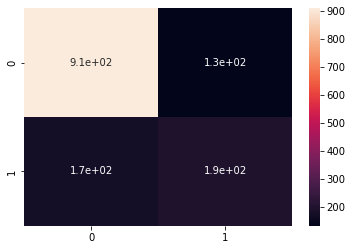

In [76]:
print("Confusion Matrix")
cm_smote=confusion_matrix(y_test, y_pred)
sns.heatmap(cm_smote, annot=True);

In [78]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1041
           1       0.60      0.53      0.56       366

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.78      0.78      1407



#### B. Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance.

In [79]:
params = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}
rs_model=RandomizedSearchCV(XGB_model,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [80]:
rs_model.fit(standardized_X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=256,...
                                           n_estimators=100, n_jobs=0,
                                           num_parallel_tree=1,
                                           predictor='auto', random_state=0,
                                           reg_alpha=0, reg_lambda=1, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [81]:
rs_model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=7,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [82]:
XGB_model_tuned = XGBClassifier(base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1)

In [84]:
cv_score=cross_val_score(XGB_model_tuned,X,y,cv=10)
cv_score

array([0.80681818, 0.81534091, 0.80085349, 0.81507824, 0.79516358,
       0.78093883, 0.82788051, 0.79516358, 0.79658606, 0.81365576])

when we take the average of all the 10 accuracies, we get 80.46%

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#D70D07;">Building ML workflow

1. Building a simple ML workflow with separate functions for various purposes
2. Various base models will be trained to select the best performing model.

In [2]:
class ML_workflow:
    
    def load_dataset(filename, filetype='csv', header=True):
        in_file = open(filename)
        data = []
        header_row = ''
    
        # Read the file line by line into instance structure
        for line in in_file.readlines():
        
            # Skip comments
            if not line.startswith("#"):
            
                # TSV file
                if filetype == 'tsv':
                    if header:
                        header_row = line.strip().split('\t')
                    else:
                        raw = line.strip().split('\t')
                    
                # CSV file
                elif filetype =='csv':
                    if header:
                        header_row = line.strip().split(',')
                    else:
                        raw = line.strip().split(',')
            
                # Neither = problem
                else:
                    print ('Invalid file type')
                    exit()
                
                # Append to dataset appropriately
                if not header:
                    data.append(raw)
                header = False
    
        # Build a new dataframe of the data instance list of lists and return
        df = pd.DataFrame(data, columns=header_row)
        return df
    
    
    def data_analysis(data):
        print("1. Head of the dataset using .head()\n2. Tail of the dataset using .tail()\n3. Shape of the dataset using .shape\n4. Columns of the dataset using .columns\n5.Description of the data using .describe()\n6. Datatypes of the columns using .dtypes\n7. Information of the data using .info()\n")
        
        choice = input('Select the Serial Numbers: ').split(",");
        print("You have Selected these Options :",choice)
        print("\n")
        for i in choice:
            if(i=='1'):
                print("\nFirst 5 rows in the data\n")
                print(data.head())
                print("\n-----------------------------------------------------------------------\n")
            elif(i=='2'):
                print("\nLast 5 rows in the data\n")
                print(data.tail())
                print("\n-----------------------------------------------------------------------\n")
            elif(i=='3'):
                print("\nNumber of rows and columns in the data\n")
                print(data.shape)
                print("\n-----------------------------------------------------------------------\n")
            elif(i=='4'):
                print("\nColumn names of the data\n")
                print(data.columns)
                print("\n-----------------------------------------------------------------------\n")
            elif(i=='5'):
                print("\n5 point summary of the data\n")
                print(data.describe(include='all').T)
                print("\n-----------------------------------------------------------------------\n");
            elif(i=='6'):
                print("\nDatatypes of the columns in the data\n")
                print(data.dtypes)
                print("\n-----------------------------------------------------------------------\n")
            elif(i=='7'):
                print("\nInformation of the data: \n")
                print(data.info())
                print("\n-----------------------------------------------------------------------\n");
            else:
                print("Invalid selection");
                
                
    def null_values(data):
        null = data.isnull().sum()
        percent = (data.isnull().sum()/data.isnull().count()).sort_values()
        null_data = pd.concat([null, percent], axis=1, keys=['TotalNullValues', 'PercentOfNullValues'])
        return null_data
    
    def unexpected_values(data):
        for i in data.columns:
            if(data[i].dtype != 'object'):
                print(data[i].value_counts)
        
    
    def to_numeric(data):
        for i in data.columns:
            print(pd.to_numeric(data[i],errors = 'coerce').isna().sum())
            
            
            
    def data_encoding(data, columns):
        data_encoded = data.copy()
        data_encoded = pd.get_dummies(data, columns=columns, drop_first=True)
        return data_encoded
    
            
    def X_y_split(data,drop_columns,target_column):
        # Independant variables are copied to X
        if(len(drop_columns)>0):
            drop_columns = drop_columns + [target_column]
        else:
            drop_columns =[target_column]
        x_data = data.drop(drop_columns, axis=1)
        y_data = data[[target_column]]
        return x_data,y_data
    
    def Train_Test_split(data,x,y,target_column,split_size,randomstate):
        # Split X and y into training and test set in 80:20 ratio
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_size, random_state=randomstate)
        print("{0:0.2f}% data is in training set".format((len(x_train)/len(data.index)) * 100))
        print("{0:0.2f}% data is in test set".format((len(x_test)/len(data.index)) * 100)) 
        print("")
        return x_train, x_test, y_train, y_test
    
    
    def std_x_train_test(data):
        std_x_train_test = pd.DataFrame(StandardScaler().fit_transform(data),columns = data.columns)
        return std_x_train_test
    
    
    def Logistic_Regression(x_train,y_train,x_test,y_test,penalty_atr,solver_atr,random_state_atr,max_iter_atr,multi_class_atr,class_weight_atr):
        if(penalty_atr==''):  penalty_atr='l2'
        if(solver_atr == ''):  solver_atr='lbfgs'
        if(random_state_atr == ''):  random_state_atr=None
        if(max_iter_atr == ''):  max_iter_atr=100
        if(multi_class_atr == ''):  multi_class_atr='auto'
        if(class_weight_atr == ''):  class_weight_atr=None

        log_model = LogisticRegression(penalty=penalty_atr,solver=solver_atr,random_state=random_state_atr,max_iter=max_iter_atr,multi_class=multi_class_atr,class_weight=class_weight_atr)
        log_model.fit(x_train, y_train)
        log_score = log_model.score(x_test,y_test)
        y_pred = log_model.predict(X_test_std)
        y_prob = log_model.predict_proba(X_test_std)
        log_classification_report = classification_report(y_test, y_pred)
        log_confusion_matrix = confusion_matrix(y_test, y_pred)
        print('Predicted values is: ', y_pred)
        print('')
        print('Predicted probability is: ', y_prob)
        print('---------------------------------------------------------------------------------------')
        print("Accuracy score:")
        print(log_score)
        print('---------------------------------------------------------------------------------------')
        print("Classification report:")
        print(log_classification_report)
        print('---------------------------------------------------------------------------------------')
        print("Confusion matrix:")
        print(log_confusion_matrix)
        
        
    def knn_Classifier(x_train,y_train,x_test,y_test,iterate,n_neighbors_atr,weights_atr,algorithm_atr,leaf_size_atr,p_atr,metric_atr):
        if(n_neighbors_atr==''):  n_neighbors_atr=5
        if(weights_atr == ''):  weights_atr='uniform'
        if(algorithm_atr == ''):  algorithm_atr='auto'
        if(leaf_size_atr == ''):  leaf_size_atr=30
        if(p_atr == ''): p_atr=2
        if(metric_atr == ''):  metric_atr='minkowski'
        
        knn_model = KNeighborsClassifier(n_neighbors = n_neighbors_atr, weights = weights_atr,algorithm=algorithm_atr,leaf_size=leaf_size_atr,p=p_atr,metric=metric_atr)
        knn_model.fit(x_train, y_train)
        knn_score = knn_model.score(x_test, y_test)
        y_pred = knn_model.predict(X_test_std)
        y_prob = knn_model.predict_proba(X_test_std)
        knn_classification_report = classification_report(y_test, y_pred)
        knn_confusion_matrix = confusion_matrix(y_test, y_pred)
        print('Predicted values is: ', y_pred)
        print('')
        print('Predicted probability is: ', y_prob)
        print('---------------------------------------------------------------------------------------')
        print("Accuracy score:")
        print(knn_score)
        print('---------------------------------------------------------------------------------------')
        print("Classification report:")
        print(knn_classification_report)
        print('---------------------------------------------------------------------------------------')
        print("Confusion matrix:")
        print(knn_confusion_matrix)
        
        
    def decision_tree_classifier(x_train,y_train,x_test,y_test,criterion_atr,splitter_atr,max_depth_atr,min_samples_split_atr,min_samples_leaf_atr,min_weight_fraction_leaf_atr,max_features_atr,random_state_atr,max_leaf_nodes_atr,min_impurity_decrease_atr,class_weight_atr,ccp_alpha_atr):
        if(criterion_atr==''): criterion_atr = 'gini'
        if(splitter_atr==''): splitter_atr = 'best'
        if(max_depth_atr==''): max_depth_atr = None
        if(min_samples_split_atr==''): min_samples_split_atr = 2
        if(min_samples_leaf_atr==''): min_samples_leaf_atr = 1
        if(min_weight_fraction_leaf_atr==''): min_weight_fraction_leaf_atr = 0.0
        if(max_features_atr==''): max_features_atr = None
        if(max_leaf_nodes_atr==''): max_leaf_nodes_atr = None
        if(random_state_atr==''): random_state_atr = None
        if(min_impurity_decrease_atr==''): min_impurity_decrease_atr = 0.0
        if(class_weight_atr==''): class_weight_atr = None
        if(ccp_alpha_atr==''): ccp_alpha_atr = 0.0
            
        dtree_model = DecisionTreeClassifier(criterion = criterion_atr, splitter = splitter_atr, max_depth = max_depth_atr, min_samples_split = min_samples_split_atr, min_samples_leaf = min_samples_leaf_atr, min_weight_fraction_leaf = min_weight_fraction_leaf_atr, max_features = max_features_atr, random_state = random_state_atr, max_leaf_nodes = max_leaf_nodes_atr, min_impurity_decrease = min_impurity_decrease_atr, class_weight = class_weight_atr, ccp_alpha = ccp_alpha_atr)
        dtree_model.fit(x_train, y_train)
        dtree_score = dtree_model.score(x_test, y_test)
        y_pred = dtree_model.predict(X_test_std)
        y_prob = dtree_model.predict_proba(X_test_std)
        dtree_classification_report = classification_report(y_test, y_pred)
        dtree_confusion_matrix = confusion_matrix(y_test, y_pred)
        print('Predicted values is: ', y_pred)
        print('')
        print('Predicted probability is: ', y_prob)
        print('---------------------------------------------------------------------------------------')
        print("Accuracy score:")
        print(dtree_score)
        print('---------------------------------------------------------------------------------------')
        print("Classification report:")
        print(dtree_classification_report)
        print('---------------------------------------------------------------------------------------')
        print("Confusion matrix:")
        print(dtree_confusion_matrix)
        
        
    def random_forest_model(x_train,y_train,x_test,y_test,n_estimators_atr,criterion_atr, min_samples_split_atr, max_depth_atr, max_features_atr, n_jobs_atr, random_state_atr, verbose_atr, ccp_alpha_atr):
        if(n_estimators_atr==''): n_estimators_atr = 100
        if(criterion_atr==''): criterion_atr = 'gini'
        if(min_samples_split_atr==''): min_samples_split_atr = 2
        if(max_depth_atr==''): max_depth_atr = None
        if(max_features_atr==''): max_features_atr = 'sqrt'
        if(n_jobs_atr==''): n_jobs_atr = None
        if(random_state_atr==''): random_state_atr = None
        if(verbose_atr==''): verbose_atr = 0
        if(ccp_alpha_atr==''): ccp_alpha_atr = 0.0
        
        random_forest = RandomForestClassifier(n_estimators=n_estimators_atr, criterion=criterion_atr, max_depth=max_depth_atr, min_samples_split=min_samples_split_atr, max_features=max_features_atr, n_jobs=n_jobs_atr, random_state=random_state_atr, verbose=verbose_atr, ccp_alpha=ccp_alpha_atr)
        random_forest.fit(X_train_std, y_train)
        random_forest_score = random_forest.score(X_test_std, y_test)
        y_pred = random_forest.predict(X_test_std)
        y_prob = random_forest.predict_proba(X_test_std)
        RF_classification_report = classification_report(y_test, y_pred)
        RF_confusion_matrix = confusion_matrix(y_test, y_pred)
        print('Predicted values is: ', y_pred)
        print('')
        print('Predicted probability is: ', y_prob)
        print('---------------------------------------------------------------------------------------')
        print("Accuracy score:")
        print(random_forest_score)
        print('---------------------------------------------------------------------------------------')
        print("Classification report:")
        print(RF_classification_report)
        print('---------------------------------------------------------------------------------------')
        print("Confusion matrix:")
        print(RF_confusion_matrix)
        
        
        
    def ADAboost_model(x_train,y_train,x_test,y_test,base_estimator_atr,n_estimators_atr, learning_rate_atr, algorithm_atr, random_state_atr):
        if(base_estimator_atr==''): base_estimator_atr= None
        if(n_estimators_atr==''): n_estimators_atr= 50
        if(learning_rate_atr==''): learning_rate_atr= 1.0
        if(algorithm_atr==''): algorithm_atr= 'SAMME.R'
        if(random_state_atr==''): random_state_atr= None
        
        ADA_model = AdaBoostClassifier(base_estimator=base_estimator_atr, n_estimators=n_estimators_atr, learning_rate=learning_rate_atr, algorithm=algorithm_atr, random_state=random_state_atr)
        ADA_model.fit(X_train_std, y_train)
        ADA_score = ADA_model.score(X_test_std, y_test)
        y_pred = ADA_model.predict(X_test_std)
        y_prob = ADA_model.predict_proba(X_test_std)
        ADA_classification_report = classification_report(y_test, y_pred)
        ADA_confusion_matrix = confusion_matrix(y_test, y_pred)
        print('Predicted values is: ', y_pred)
        print('')
        print('Predicted probability is: ', y_prob)
        print('---------------------------------------------------------------------------------------')
        print("Accuracy score:")
        print(ADA_score)
        print('---------------------------------------------------------------------------------------')
        print("Classification report:")
        print(ADA_classification_report)
        print('---------------------------------------------------------------------------------------')
        print("Confusion matrix:")
        print(ADA_confusion_matrix)
        
    

In [3]:
ML = ML_workflow

In [4]:
data = ML.load_dataset("Downloads/TelcomCustomer-Churn_2.csv")
data.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [5]:
#Printing head and tail of the data
ML.data_analysis(data)

1. Head of the dataset using .head()
2. Tail of the dataset using .tail()
3. Shape of the dataset using .shape
4. Columns of the dataset using .columns
5.Description of the data using .describe()
6. Datatypes of the columns using .dtypes
7. Information of the data using .info()

Select the Serial Numbers: 1,2
You have Selected these Options : ['1', '2']



First 5 rows in the data

   customerID OnlineBackup DeviceProtection TechSupport StreamingTV  \
0  7590-VHVEG          Yes               No          No          No   
1  5575-GNVDE           No              Yes          No          No   
2  3668-QPYBK          Yes               No          No          No   
3  7795-CFOCW           No              Yes         Yes          No   
4  9237-HQITU           No               No          No          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check   
1              No        O

In [6]:
ML.null_values(data)

,TotalNullValues,PercentOfNullValues
customerID,0,0.0
OnlineBackup,0,0.0
DeviceProtection,0,0.0
TechSupport,0,0.0
StreamingTV,0,0.0
StreamingMovies,0,0.0
Contract,0,0.0
PaperlessBilling,0,0.0
PaymentMethod,0,0.0
MonthlyCharges,0,0.0


In [7]:
ML.unexpected_values(data)

It shows that there are no unexpected values

In [8]:
ML.to_numeric(data)

7043
7043
7043
7043
7043
7043
7043
7043
7043
0
11
7043


MonthlyCharges and TotalCharges should be converted to numeric when we apply pd.to_numeric. when we do that there is no null values (NaN) in that column, as everything can converted to numeric value. But in TotalCharges, there are 11 null values. This is because of the unexpected values present in it.

In [9]:
data['MonthlyCharges'] = data['MonthlyCharges'].astype('float')

In [10]:
data['MonthlyCharges'].dtype

dtype('float64')

In [11]:
data.drop(data.loc[data['TotalCharges']== ' '].index, inplace=True)

In [12]:
data['TotalCharges'] = data['TotalCharges'].astype('float')

In [13]:
data['TotalCharges'].dtype

dtype('float64')

In [14]:
#Rechecking datatype
ML.data_analysis(data)

1. Head of the dataset using .head()
2. Tail of the dataset using .tail()
3. Shape of the dataset using .shape
4. Columns of the dataset using .columns
5.Description of the data using .describe()
6. Datatypes of the columns using .dtypes
7. Information of the data using .info()

Select the Serial Numbers: 6
You have Selected these Options : ['6']



Datatypes of the columns in the data

customerID           object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

-----------------------------------------------------------------------



Now MonthlyCharges and TotalCharges are converted to float which is the appropriate data type to fit the model.

In [15]:
data_encoded = ML.data_encoding(data, columns=['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']) 

In [16]:
data_encoded.head()

,customerID,MonthlyCharges,TotalCharges,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,29.85,29.85,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,56.95,1889.50,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,53.85,108.15,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,42.30,1840.75,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,70.70,151.65,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [17]:
X,y = ML.X_y_split(data=data_encoded,drop_columns=['customerID'],target_column='Churn_Yes')


In [18]:
X.head()

,MonthlyCharges,TotalCharges,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,29.85,29.85,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,56.95,1889.50,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,53.85,108.15,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,42.30,1840.75,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,70.70,151.65,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [19]:
y.head()

,Churn_Yes
0,0
1,0
2,1
3,0
4,1


In [20]:
X_train, X_test, y_train, y_test = ML.Train_Test_split(data, x=X, y=y, target_column='Churn', split_size=0.20, randomstate=1)

79.99% data is in training set
20.01% data is in test set



In [21]:
#shape of x_train
ML.data_analysis(X_train)

1. Head of the dataset using .head()
2. Tail of the dataset using .tail()
3. Shape of the dataset using .shape
4. Columns of the dataset using .columns
5.Description of the data using .describe()
6. Datatypes of the columns using .dtypes
7. Information of the data using .info()

Select the Serial Numbers: 3
You have Selected these Options : ['3']



Number of rows and columns in the data

(5625, 18)

-----------------------------------------------------------------------



In [22]:
#shape of x_test
ML.data_analysis(X_test)

1. Head of the dataset using .head()
2. Tail of the dataset using .tail()
3. Shape of the dataset using .shape
4. Columns of the dataset using .columns
5.Description of the data using .describe()
6. Datatypes of the columns using .dtypes
7. Information of the data using .info()

Select the Serial Numbers: 3
You have Selected these Options : ['3']



Number of rows and columns in the data

(1407, 18)

-----------------------------------------------------------------------



In [23]:
#Standardisation/Normalization
X_train_std = ML.std_x_train_test(X_train)
X_train_std

,MonthlyCharges,TotalCharges,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.508689,-0.995607,1.914205,-0.728717,1.914205,-0.726431,1.914205,-0.647595,1.914205,-0.795786,1.914205,-0.791918,-0.51634,-0.562225,0.830480,-0.524615,-0.711921,1.810405
1,-1.473855,-0.409302,1.914205,-0.728717,1.914205,-0.726431,1.914205,-0.647595,1.914205,-0.795786,1.914205,-0.791918,-0.51634,1.778646,-1.204123,-0.524615,-0.711921,1.810405
2,0.843392,1.918629,-0.522410,1.372274,-0.522410,1.376593,-0.522410,1.544175,-0.522410,1.256619,-0.522410,1.262758,-0.51634,1.778646,-1.204123,-0.524615,1.404651,-0.552363
3,1.183432,2.210555,-0.522410,1.372274,-0.522410,1.376593,-0.522410,-0.647595,-0.522410,1.256619,-0.522410,-0.791918,-0.51634,1.778646,-1.204123,-0.524615,-0.711921,-0.552363
4,-0.634537,-0.984057,-0.522410,-0.728717,-0.522410,-0.726431,-0.522410,-0.647595,-0.522410,-0.795786,-0.522410,-0.791918,-0.51634,-0.562225,0.830480,-0.524615,-0.711921,1.810405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5620,0.012368,-0.464202,-0.522410,1.372274,-0.522410,-0.726431,-0.522410,1.544175,-0.522410,-0.795786,-0.522410,1.262758,1.93671,-0.562225,0.830480,-0.524615,-0.711921,-0.552363
5621,1.377503,2.238147,-0.522410,1.372274,-0.522410,1.376593,-0.522410,-0.647595,-0.522410,1.256619,-0.522410,1.262758,1.93671,-0.562225,0.830480,-0.524615,1.404651,-0.552363
5622,0.382265,-0.636859,-0.522410,-0.728717,-0.522410,-0.726431,-0.522410,-0.647595,-0.522410,-0.795786,-0.522410,-0.791918,-0.51634,-0.562225,0.830480,-0.524615,1.404651,-0.552363
5623,-0.350894,-0.954142,-0.522410,1.372274,-0.522410,-0.726431,-0.522410,-0.647595,-0.522410,-0.795786,-0.522410,-0.791918,-0.51634,-0.562225,0.830480,-0.524615,-0.711921,1.810405


In [24]:
X_test_std = ML.std_x_train_test(X_test)
X_test_std

,MonthlyCharges,TotalCharges,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.318415,-0.178536,1.865715,-0.712768,1.865715,-0.713902,1.865715,-0.606092,1.865715,-0.768004,1.865715,-0.816738,-0.507319,1.792366,-1.215365,1.892898,-0.711635,-0.508426
1,0.712873,-0.397894,-0.535988,-0.712768,-0.535988,-0.713902,-0.535988,-0.606092,-0.535988,-0.768004,-0.535988,1.224382,-0.507319,-0.557922,0.822798,1.892898,-0.711635,-0.508426
2,1.118460,1.813064,-0.535988,1.402981,-0.535988,-0.713902,-0.535988,-0.606092,-0.535988,1.302076,-0.535988,1.224382,-0.507319,1.792366,-1.215365,-0.528291,-0.711635,-0.508426
3,0.427956,-0.720437,-0.535988,-0.712768,-0.535988,-0.713902,-0.535988,-0.606092,-0.535988,-0.768004,-0.535988,-0.816738,-0.507319,-0.557922,0.822798,-0.528291,1.405215,-0.508426
4,0.572091,-0.589557,-0.535988,1.402981,-0.535988,1.400752,-0.535988,-0.606092,-0.535988,-0.768004,-0.535988,-0.816738,-0.507319,-0.557922,0.822798,-0.528291,1.405215,-0.508426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,-1.492717,-0.624073,1.865715,-0.712768,1.865715,-0.713902,1.865715,-0.606092,1.865715,-0.768004,1.865715,-0.816738,-0.507319,1.792366,-1.215365,-0.528291,-0.711635,1.966853
1403,0.515107,-0.955409,-0.535988,1.402981,-0.535988,-0.713902,-0.535988,-0.606092,-0.535988,-0.768004,-0.535988,-0.816738,-0.507319,-0.557922,0.822798,-0.528291,1.405215,-0.508426
1404,1.078237,1.240704,-0.535988,-0.712768,-0.535988,1.400752,-0.535988,1.649916,-0.535988,-0.768004,-0.535988,1.224382,-0.507319,1.792366,0.822798,-0.528291,-0.711635,-0.508426
1405,1.368181,2.395283,-0.535988,1.402981,-0.535988,1.400752,-0.535988,1.649916,-0.535988,-0.768004,-0.535988,1.224382,1.971146,-0.557922,0.822798,1.892898,-0.711635,-0.508426


In [25]:
#Fitting logistic regression model with default parameters and finding score with test data
ML.Logistic_Regression(X_train_std, y_train, X_test_std, y_test, penalty_atr='', solver_atr='', random_state_atr='', max_iter_atr='', multi_class_atr='', class_weight_atr='')

Predicted values is:  [0 1 0 ... 0 0 0]

Predicted probability is:  [[0.98578248 0.01421752]
 [0.39941313 0.60058687]
 [0.96474088 0.03525912]
 ...
 [0.95636083 0.04363917]
 [0.94955956 0.05044044]
 [0.86160973 0.13839027]]
---------------------------------------------------------------------------------------
Accuracy score:
0.7853589196872779
---------------------------------------------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1041
           1       0.60      0.51      0.55       366

    accuracy                           0.79      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407

---------------------------------------------------------------------------------------
Confusion matrix:
[[920 121]
 [181 185]]


In [26]:
#Fitting KNN classification model with default parameters and finding score with test data
ML.knn_Classifier(X_train_std, y_train, X_test_std, y_test, iterate='', n_neighbors_atr='', weights_atr='', algorithm_atr='', leaf_size_atr='', p_atr='', metric_atr='')

Predicted values is:  [0 1 0 ... 0 0 0]

Predicted probability is:  [[1.  0. ]
 [0.2 0.8]
 [1.  0. ]
 ...
 [1.  0. ]
 [0.8 0.2]
 [0.6 0.4]]
---------------------------------------------------------------------------------------
Accuracy score:
0.7611940298507462
---------------------------------------------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1041
           1       0.54      0.51      0.53       366

    accuracy                           0.76      1407
   macro avg       0.69      0.68      0.68      1407
weighted avg       0.76      0.76      0.76      1407

---------------------------------------------------------------------------------------
Confusion matrix:
[[883 158]
 [178 188]]


In [27]:
#Fitting Decision tree model with default parameters and finding score with test data
ML.decision_tree_classifier(X_train_std, y_train, X_test_std, y_test, criterion_atr = '', splitter_atr = '', max_depth_atr = '', min_samples_split_atr = '', min_samples_leaf_atr = '', min_weight_fraction_leaf_atr = '', max_features_atr = '', random_state_atr = '', max_leaf_nodes_atr = '', min_impurity_decrease_atr = '', class_weight_atr = '', ccp_alpha_atr = '')

Predicted values is:  [0 1 0 ... 0 1 0]

Predicted probability is:  [[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]
---------------------------------------------------------------------------------------
Accuracy score:
0.7064676616915423
---------------------------------------------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1041
           1       0.44      0.43      0.43       366

    accuracy                           0.71      1407
   macro avg       0.62      0.62      0.62      1407
weighted avg       0.71      0.71      0.71      1407

---------------------------------------------------------------------------------------
Confusion matrix:
[[836 205]
 [208 158]]


In [28]:
ML.random_forest_model(X_train_std, y_train, X_test_std, y_test, n_estimators_atr='', criterion_atr='', max_depth_atr='', min_samples_split_atr='', max_features_atr='', n_jobs_atr='', random_state_atr='', verbose_atr='', ccp_alpha_atr='')

Predicted values is:  [0 1 0 ... 0 0 0]

Predicted probability is:  [[1.   0.  ]
 [0.12 0.88]
 [0.91 0.09]
 ...
 [0.98 0.02]
 [0.89 0.11]
 [0.8  0.2 ]]
---------------------------------------------------------------------------------------
Accuracy score:
0.783226723525231
---------------------------------------------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1041
           1       0.59      0.54      0.56       366

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.78      0.78      1407

---------------------------------------------------------------------------------------
Confusion matrix:
[[906 135]
 [170 196]]


In [29]:
ML.ADAboost_model(X_train_std, y_train, X_test_std, y_test, base_estimator_atr='', n_estimators_atr='', learning_rate_atr='', algorithm_atr='', random_state_atr='')

Predicted values is:  [0 0 0 ... 0 0 0]

Predicted probability is:  [[0.52614348 0.47385652]
 [0.50021086 0.49978914]
 [0.51592332 0.48407668]
 ...
 [0.51423072 0.48576928]
 [0.50214898 0.49785102]
 [0.50709716 0.49290284]]
---------------------------------------------------------------------------------------
Accuracy score:
0.7896233120113717
---------------------------------------------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1041
           1       0.62      0.48      0.54       366

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407

---------------------------------------------------------------------------------------
Confusion matrix:
[[935 106]
 [190 176]]
